# Simple Linear Regression of Tanks Dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#racalling the csv file
df = pd.read_csv("e:/tanksdataset9parameters.csv")
df

,tank name,H/D,H,D,HL,HL/H (%full),t,max pga(abs value),magnitude,mesh edge size,actual max uplift
0,TANKA01,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,TANKA02,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,TANKA03,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,TANKA04,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,TANKA05,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...,...
355,TANKD86,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,TANKD87,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,TANKD88,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,TANKD89,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [3]:
df.describe()

,H/D,H,D,HL,HL/H (%full),t,max pga(abs value),magnitude,mesh edge size,actual max uplift
count,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,1.146053,16.625000,18.450000,11.67500,0.704861,0.013000,3.795722,6.664000,0.800000,0.041383
std,0.572768,9.482703,11.772531,7.32057,0.170007,0.005424,3.317691,0.266724,0.346892,0.048906
min,0.400000,4.500000,3.800000,2.20000,0.488889,0.006000,0.431000,6.190000,0.200000,0.003007
25%,0.850000,10.125000,8.450000,5.55000,0.500000,0.008000,1.559000,6.610000,0.800000,0.009359
50%,1.092105,16.000000,20.000000,10.50000,0.704167,0.012500,2.578700,6.690000,1.000000,0.018393
75%,1.388158,22.500000,30.000000,15.75000,0.900000,0.018000,5.785500,6.900000,1.000000,0.057454
max,2.000000,30.000000,30.000000,27.00000,0.933333,0.021000,12.139800,6.930000,1.000000,0.289944


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tank name           360 non-null    object 
 1   H/D                 360 non-null    float64
 2   H                   360 non-null    float64
 3   D                   360 non-null    float64
 4   HL                  360 non-null    float64
 5   HL/H (%full)        360 non-null    float64
 6   t                   360 non-null    float64
 7   max pga(abs value)  360 non-null    float64
 8   magnitude           360 non-null    float64
 9   mesh edge size      360 non-null    float64
 10  actual max uplift   360 non-null    float64
dtypes: float64(10), object(1)
memory usage: 31.1+ KB


In [5]:
corr_matrix =df.corr()
corr_matrix["actual max uplift"].sort_values(ascending =False)

actual max uplift     1.000000
max pga(abs value)    0.434505
HL                    0.367842
mesh edge size        0.318183
H                     0.277341
t                     0.275614
HL/H (%full)          0.262191
H/D                   0.194278
magnitude             0.102490
D                     0.095161
Name: actual max uplift, dtype: float64

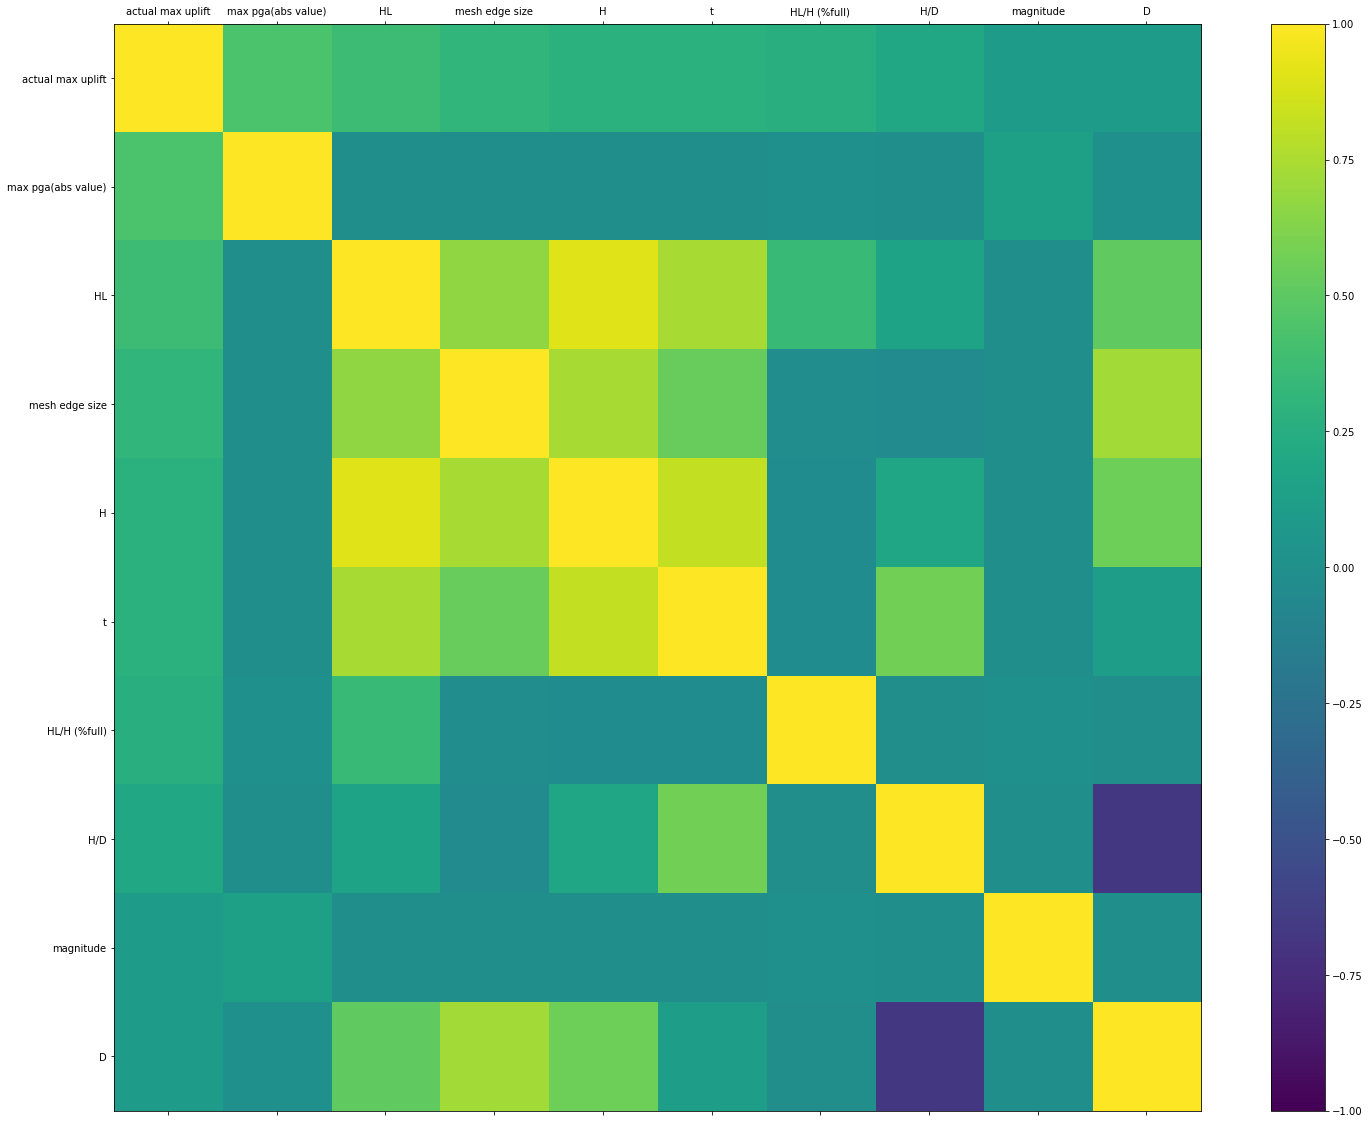

In [21]:
names=['actual max uplift','max pga(abs value)','HL','mesh edge size','H','t','HL/H (%full)','H/D','magnitude','D']
df=df[names]
correlations= df.corr()
fig=plt.figure(figsize=(25,20))
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

array([[<AxesSubplot:xlabel='actual max uplift', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='max pga(abs value)', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='HL', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='mesh edge size', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='H', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='t', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='HL/H (%full)', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='H/D', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='magnitude', ylabel='actual max uplift'>,
        <AxesSubplot:xlabel='D', ylabel='actual max uplift'>],
       [<AxesSubplot:xlabel='actual max uplift', ylabel='max pga(abs value)'>,
        <AxesSubplot:xlabel='max pga(abs value)', ylabel='max pga(abs value)'>,
        <AxesSubplot:xlabel='HL', ylabel='max pga(abs value)'>,
        <AxesSubplot:xlabel='mesh edge size', ylabel='max pga(abs value)'>,
        <Axe

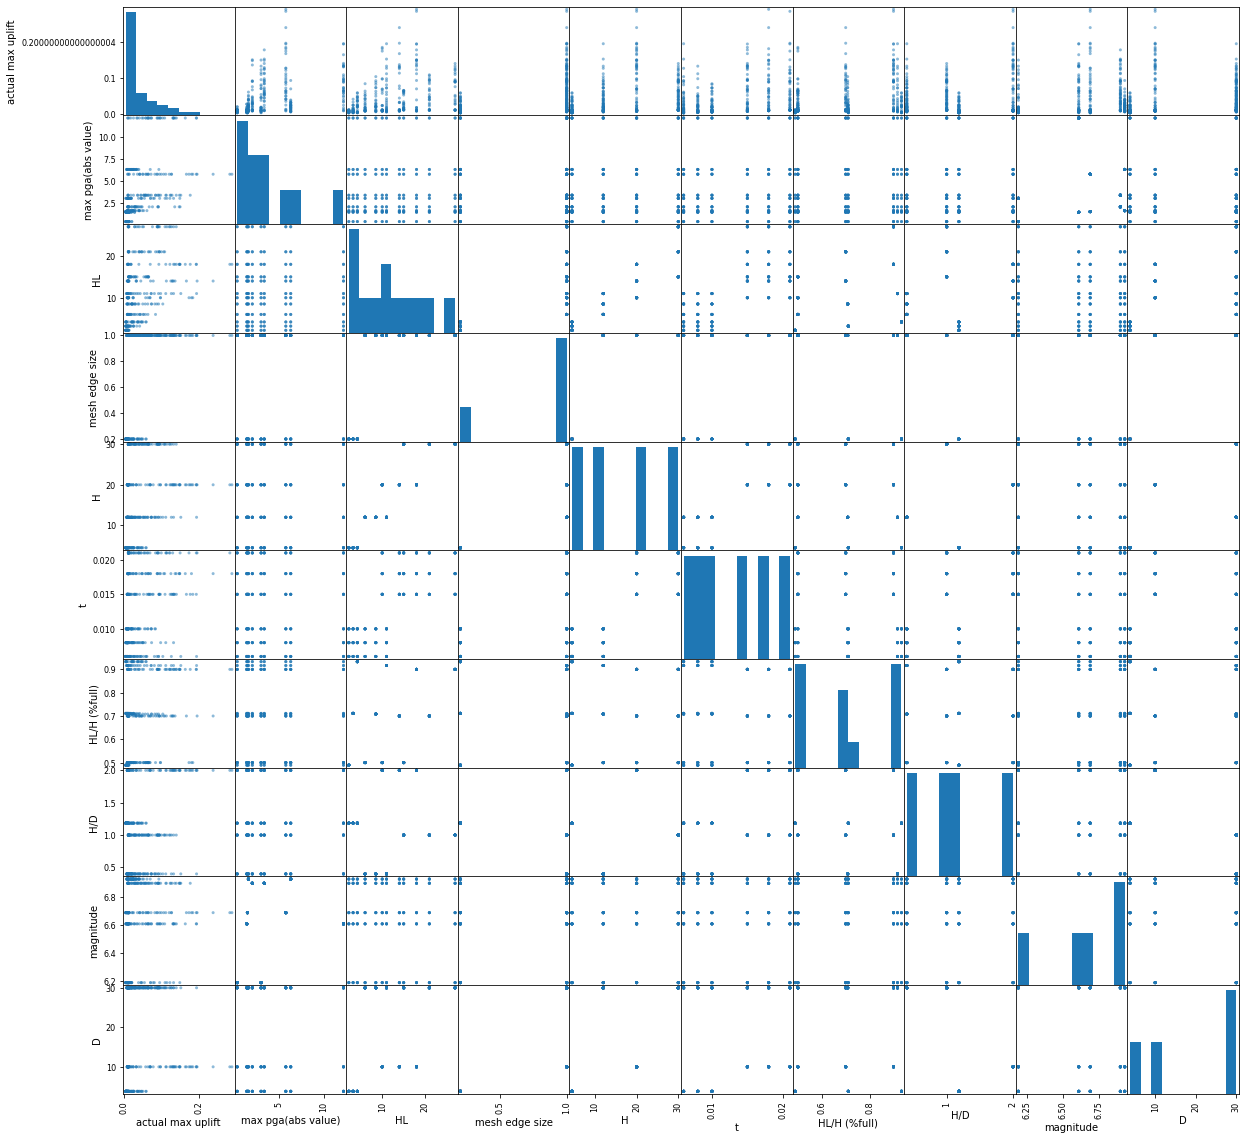

In [19]:
from pandas.plotting import scatter_matrix
Numerical_chart=['actual max uplift','max pga(abs value)','HL','mesh edge size','H','t','HL/H (%full)','H/D','magnitude','D']
scatter_matrix(df[Numerical_chart],figsize=(20,20))

In [22]:
df.describe().copy()

,actual max uplift,max pga(abs value),HL,mesh edge size,H,t,HL/H (%full),H/D,magnitude,D
count,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.041383,3.795722,11.67500,0.800000,16.625000,0.013000,0.704861,1.146053,6.664000,18.450000
std,0.048906,3.317691,7.32057,0.346892,9.482703,0.005424,0.170007,0.572768,0.266724,11.772531
min,0.003007,0.431000,2.20000,0.200000,4.500000,0.006000,0.488889,0.400000,6.190000,3.800000
25%,0.009359,1.559000,5.55000,0.800000,10.125000,0.008000,0.500000,0.850000,6.610000,8.450000
50%,0.018393,2.578700,10.50000,1.000000,16.000000,0.012500,0.704167,1.092105,6.690000,20.000000
75%,0.057454,5.785500,15.75000,1.000000,22.500000,0.018000,0.900000,1.388158,6.900000,30.000000
max,0.289944,12.139800,27.00000,1.000000,30.000000,0.021000,0.933333,2.000000,6.930000,30.000000


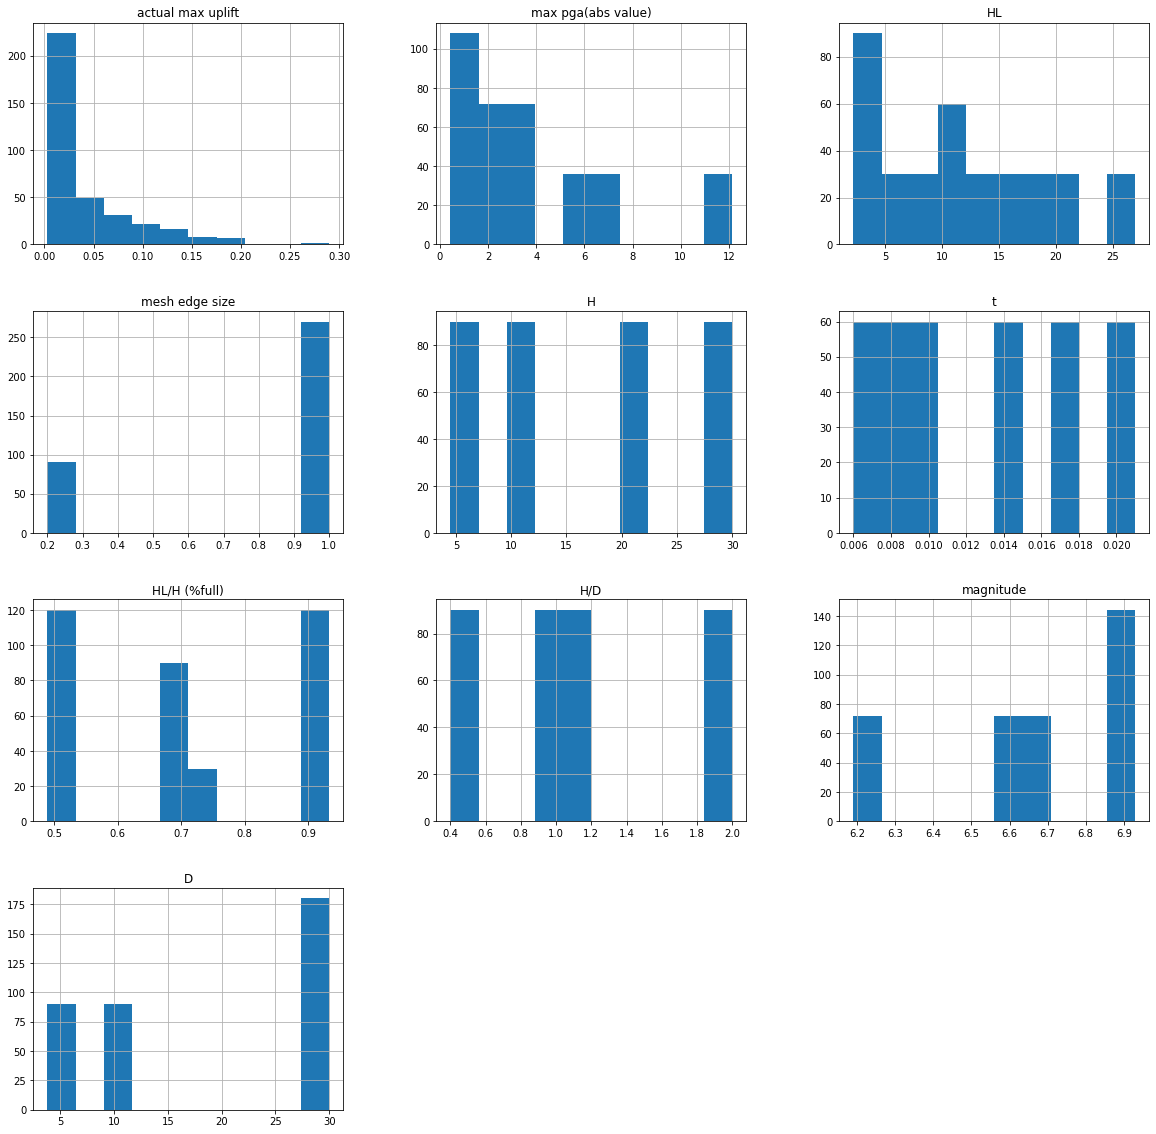

In [26]:
df.hist(figsize=(20,20))
plt.show()

In [38]:
msk = np.random.rand(len(ndf)) < 0.8
train = ndf[msk]
test = ndf[~msk]

In [39]:
ndf=df.rename(columns={'actual max uplift': 'actualmaxuplift', 'max pga(abs value)': 'maxpga_absvalue' , 'mesh edge size': 'meshedgesize','HL/H (%full)': 'HLH','H/D': 'HD',})
ndf

,actualmaxuplift,maxpga_absvalue,HL,meshedgesize,H,t,HLH,HD,magnitude,D
0,0.045620,3.05900,4.2,0.2,4.5,0.006,0.933333,1.184211,6.19,3.8
1,0.058750,5.78550,4.2,0.2,4.5,0.006,0.933333,1.184211,6.69,3.8
2,0.045015,3.41200,4.2,0.2,4.5,0.006,0.933333,1.184211,6.90,3.8
3,0.057487,12.13980,4.2,0.2,4.5,0.006,0.933333,1.184211,6.61,3.8
4,0.025031,6.32480,4.2,0.2,4.5,0.006,0.933333,1.184211,6.93,3.8
...,...,...,...,...,...,...,...,...,...,...
355,0.010545,0.43100,10.0,1.0,20.0,0.021,0.500000,2.000000,6.19,10.0
356,0.010576,1.55900,10.0,1.0,20.0,0.021,0.500000,2.000000,6.69,10.0
357,0.010758,2.09840,10.0,1.0,20.0,0.021,0.500000,2.000000,6.90,10.0
358,0.010547,1.48070,10.0,1.0,20.0,0.021,0.500000,2.000000,6.61,10.0


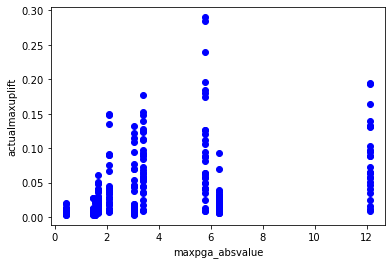

In [40]:
plt.scatter(train.maxpga_absvalue, train.actualmaxuplift,  color='blue')
plt.xlabel("maxpga_absvalue")
plt.ylabel("actualmaxuplift")
plt.show()

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['maxpga_absvalue']])
train_y = np.asanyarray(train[['actualmaxuplift']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00667454]]
Intercept:  [0.01736356]


Text(0, 0.5, 'actualmaxuplift')

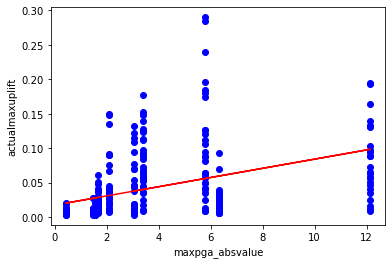

In [42]:
plt.scatter(train.maxpga_absvalue, train.actualmaxuplift,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("maxpga_absvalue")
plt.ylabel("actualmaxuplift")

In [43]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['maxpga_absvalue']])
test_y = np.asanyarray(test[['actualmaxuplift']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.21


# ..................................................................................................................................
# Conclusion : Since the variables are completely independent and also there is a lack of vast data on the tanks, single linear regression would not be a suitable model for predicting the relation between the target and a variable(there is no linear relation between each variable and target). Thus we should try other kinds of ML models such as multi-linear and non-linear regression etc.
# ..................................................................................................................................